# Reload the predictions

This time for the North side, using the "modified" data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import open_cp.scripted
import open_cp.scripted.analysis as analysis

In [2]:
betas = analysis.hit_counts_to_beta("North_mod_all.csv")

In [3]:
{ analysis.parse_prediction_key(key).name for key in betas }

{'ExpDecayGridProvider',
 'FullKDEProvider',
 'GridSpaceExpDecayProvider',
 'GridSpaceKDEProvider',
 'GridSpaceSimpleHistogramProvider',
 'GridSpaceSimpleProvider',
 'KDEGridProvider',
 'NaiveProvider',
 'NonParamGridProvider'}

### `ExpDecayGridProvider`

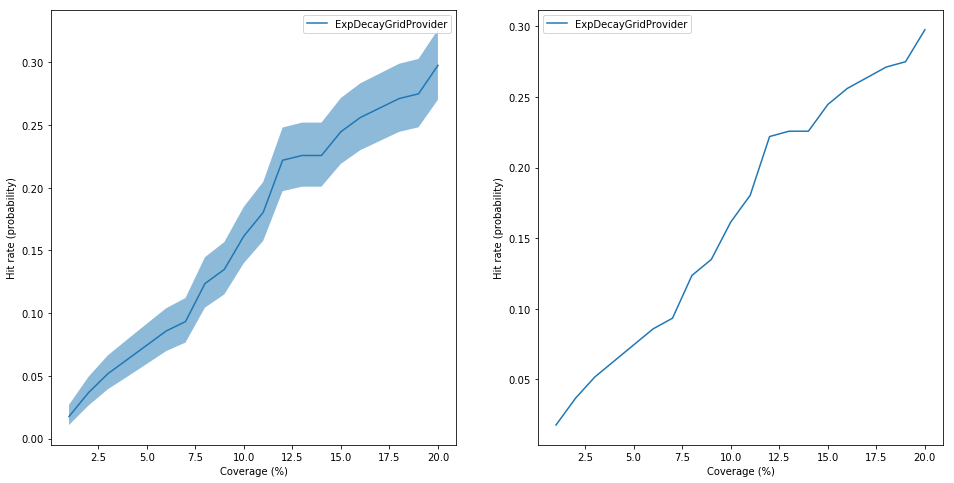

In [4]:
name = "ExpDecayGridProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)

### `FullKDEProvider`

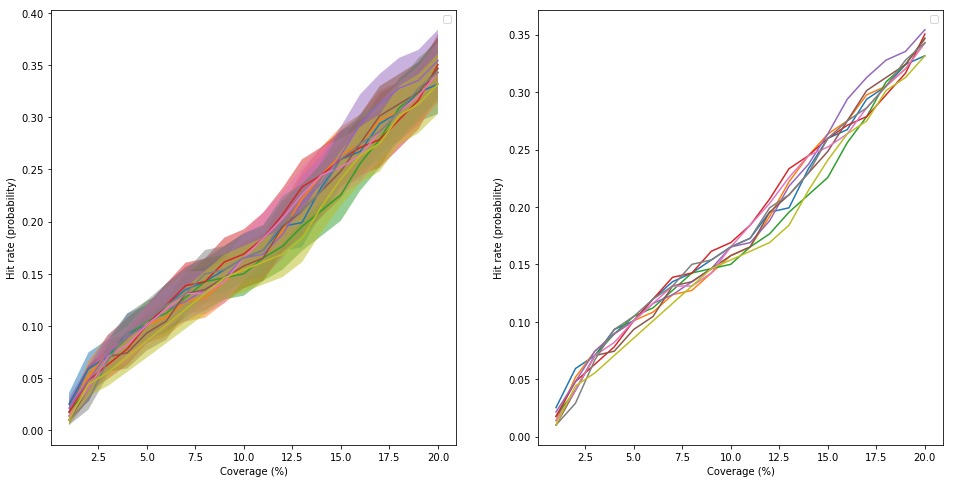

In [5]:
name = "FullKDEProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

### `GridSpaceKDEProvider`

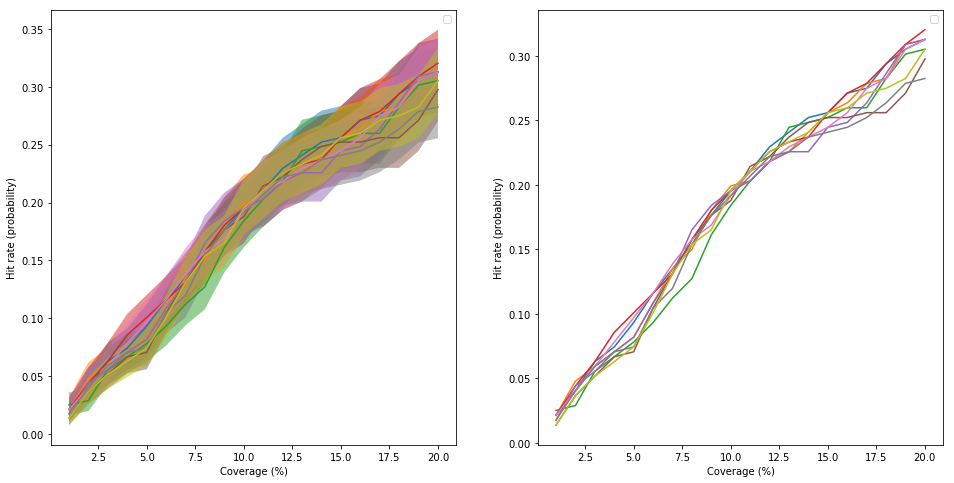

In [7]:
name = "GridSpaceKDEProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

### `GridSpaceSimpleHistogramProvider`

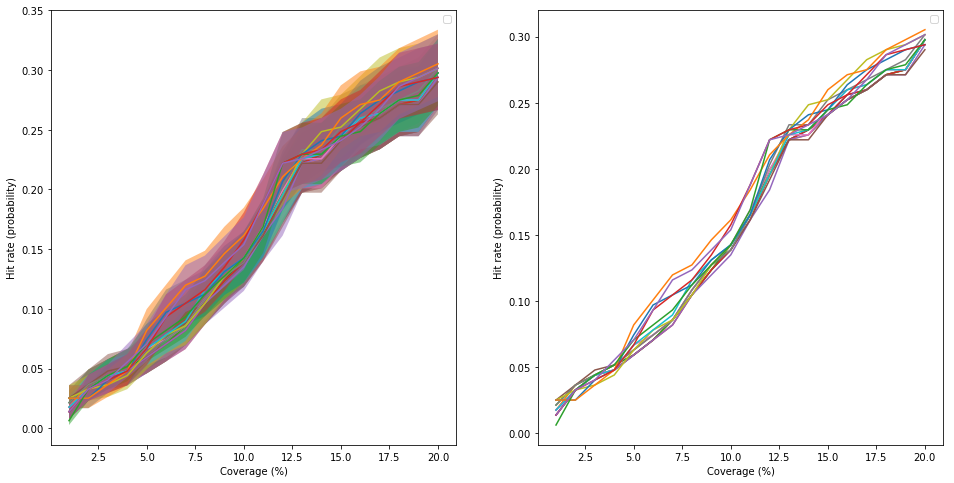

In [8]:
name = "GridSpaceSimpleHistogramProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

### `GridSpaceSimpleProvider`

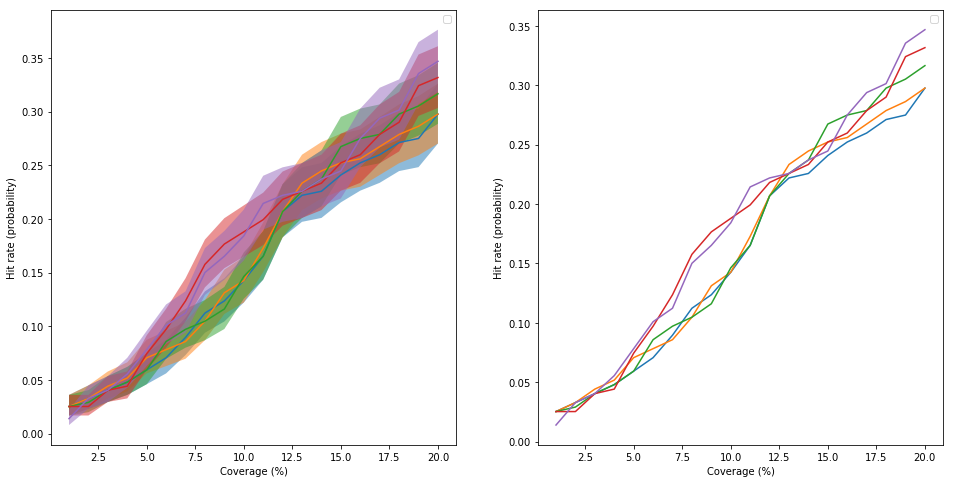

In [9]:
name = "GridSpaceSimpleProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

### `KDEGridProvider`

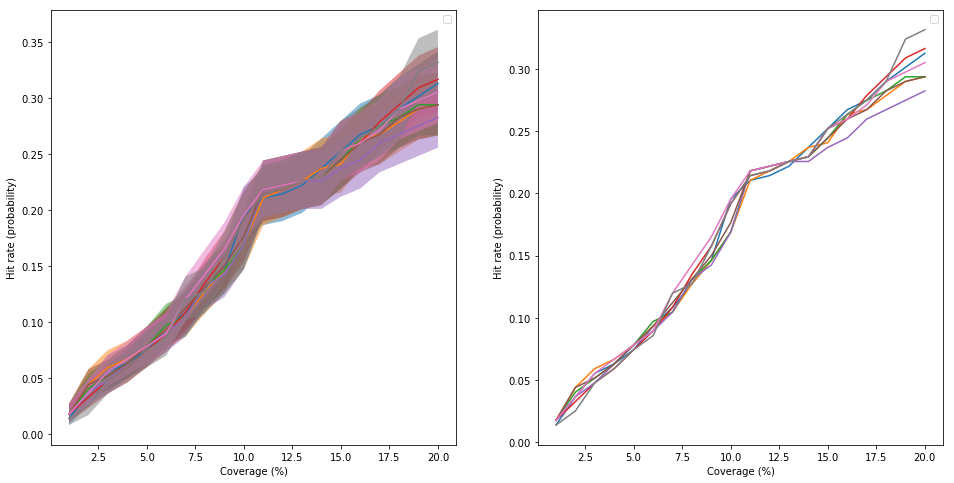

In [11]:
name = "KDEGridProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

### `NaiveProvider`

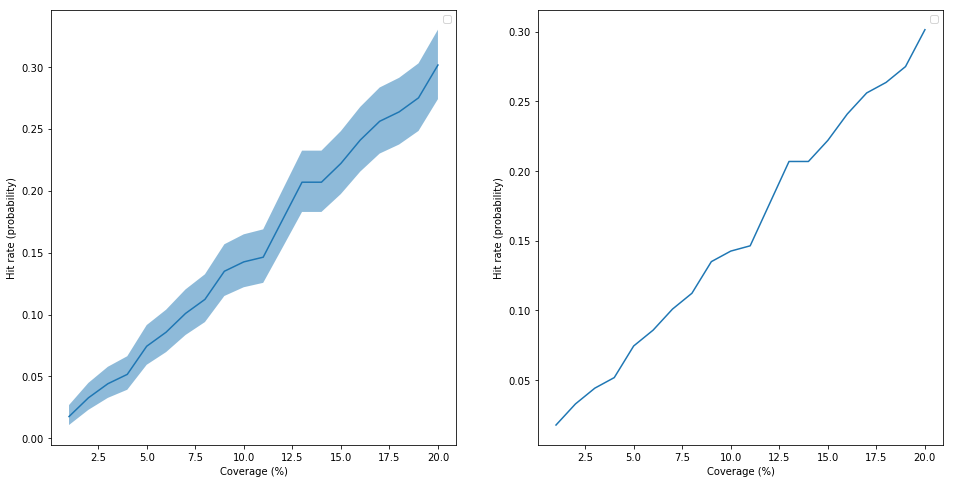

In [12]:
name = "NaiveProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

### `NonParamGridProvider`

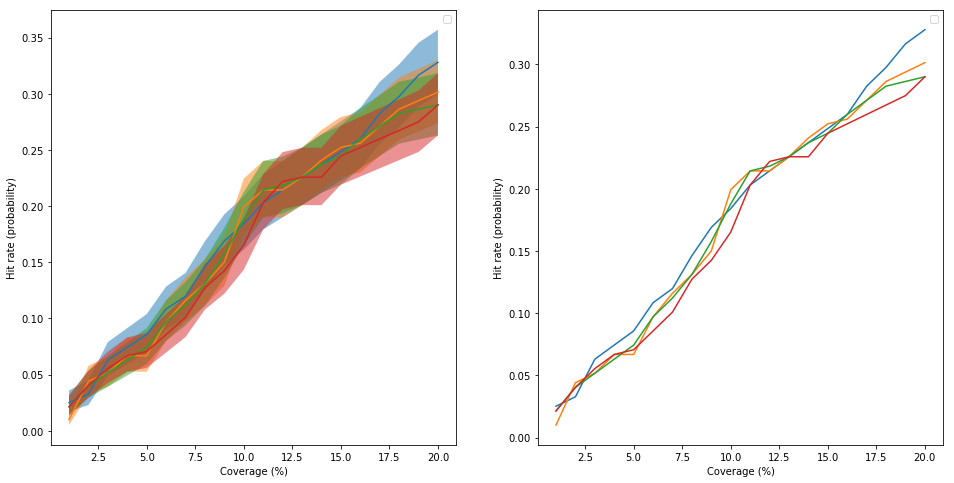

In [13]:
name = "NonParamGridProvider"
bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(bs, axes[0], coverages=range(1,21))
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
for ax in axes:
    ax.legend([])

## All the predictions

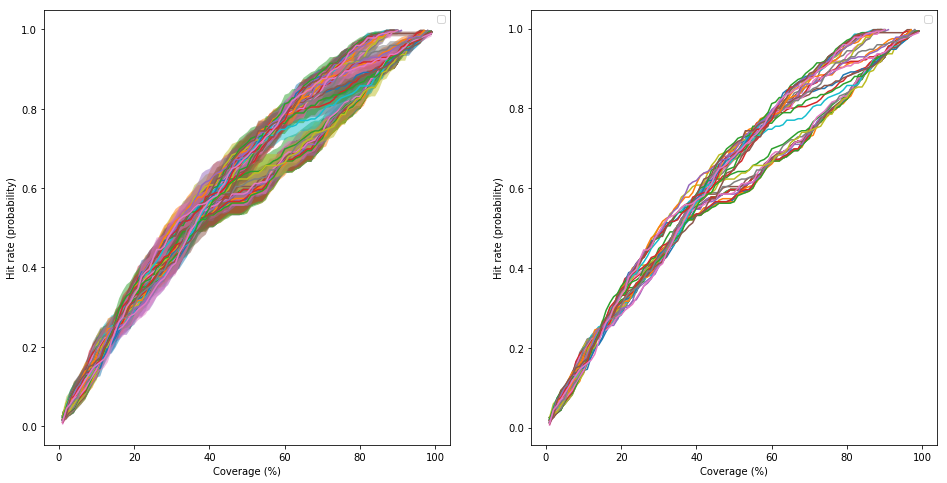

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(betas, axes[0])
analysis.plot_betas(betas, axes[1], plot_sds=False)
for ax in axes:
    ax.legend([])

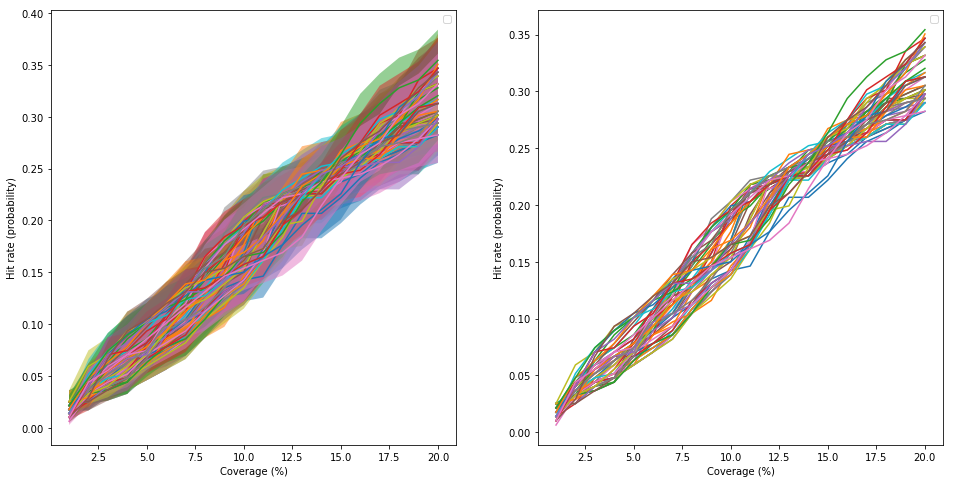

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(betas, axes[0], range(1,21))
analysis.plot_betas(betas, axes[1], range(1,21), False)
for ax in axes:
    ax.legend([])

In [16]:
def ordered_by_name(name):
    bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
    coverages, max_by_cov = analysis.compute_betas_means_against_max(bs, range(1, 21))
    maxes = [(k,np.mean(v)) for k,v in max_by_cov.items()]
    maxes.sort(key = lambda pr : -pr[1])
    return maxes

want = []
for name in {analysis.parse_prediction_key(key).name for key in betas}:
    maxes = ordered_by_name(name)
    key = maxes[0][0]
    want.append(key)

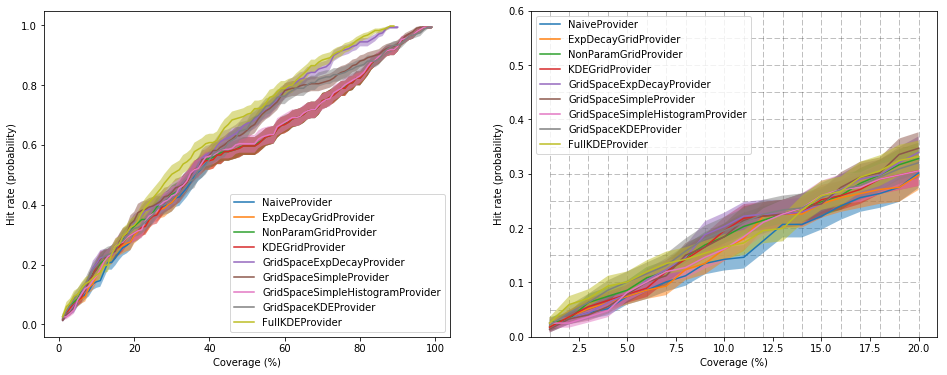

In [17]:
bs = {k:v for k,v in betas.items() if k in want}

fig, axes = plt.subplots(ncols=2, figsize=(16,6))
analysis.plot_betas(bs, axes[0])
analysis.plot_betas(bs, axes[1], coverages=range(1,21))
axes[1].set(ylim=[0,0.6])

for ax, loc in zip(axes, [4, 2]):
    ax.legend([analysis.parse_prediction_key(k).name for k in bs], loc=loc)
ax = axes[1]
for y in range(12):
    ax.plot([1, 20], [y/20, y/20], linewidth=0.5, linestyle="--", alpha=0.5, color="black", zorder=-20)
for x in np.linspace(1, 20, 20):
    ax.plot([x, x], [0, 0.6], linewidth=0.5, linestyle="--", alpha=0.5, color="black", zorder=-20)

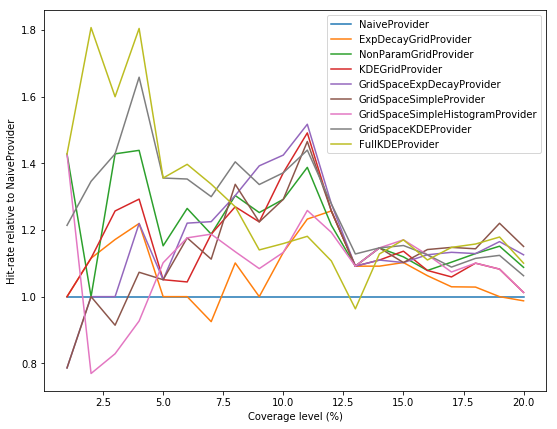

In [19]:
fig, ax = plt.subplots(figsize=(9,7))

base = bs['NaiveProvider (CountingGridKernel)']

x = list(range(1, 21))
by_key = []
for key, b in bs.items():
    y = [b[t].median() / base[t].median() for t in x]
    ax.plot(x, y)
    by_key.append((analysis.parse_prediction_key(key).name, np.mean(y)))
ax.legend([analysis.parse_prediction_key(k).name for k in bs])
ax.set(xlabel="Coverage level (%)", ylabel="Hit-rate relative to NaiveProvider")
None

In [21]:
by_key.sort(key = lambda pa : pa[1])
by_key

[('NaiveProvider', 1.0),
 ('ExpDecayGridProvider', 1.0774335760333638),
 ('GridSpaceSimpleHistogramProvider', 1.1012465116695185),
 ('GridSpaceSimpleProvider', 1.141650697371843),
 ('KDEGridProvider', 1.1616214867266517),
 ('GridSpaceExpDecayProvider', 1.1700229162429223),
 ('NonParamGridProvider', 1.2128740965894109),
 ('GridSpaceKDEProvider', 1.2714997194757367),
 ('FullKDEProvider', 1.277222638784512)]

## Same again with extra fixed

Turns out these do better now...

In [22]:
new_betas = analysis.hit_counts_to_beta("North_mod_fixed.csv")
for k,v in new_betas.items():
    betas[k] = v

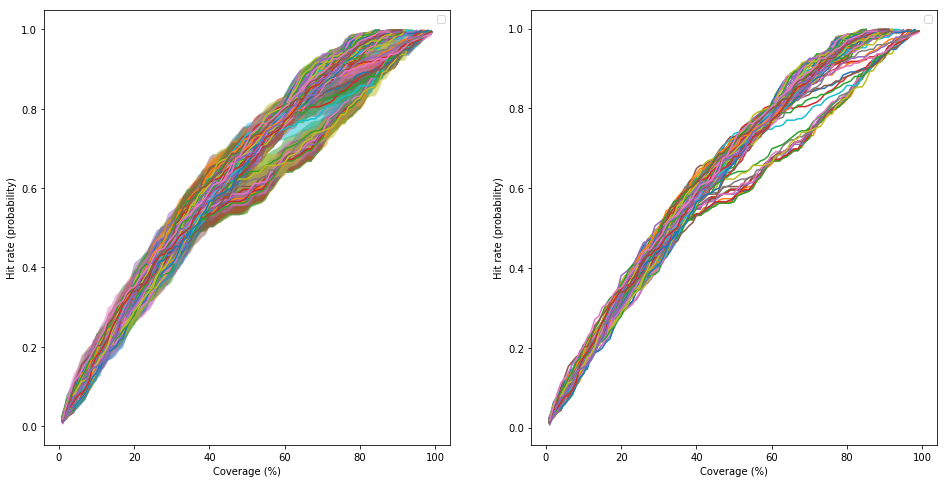

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(betas, axes[0])
analysis.plot_betas(betas, axes[1], plot_sds=False)
for ax in axes:
    ax.legend([])

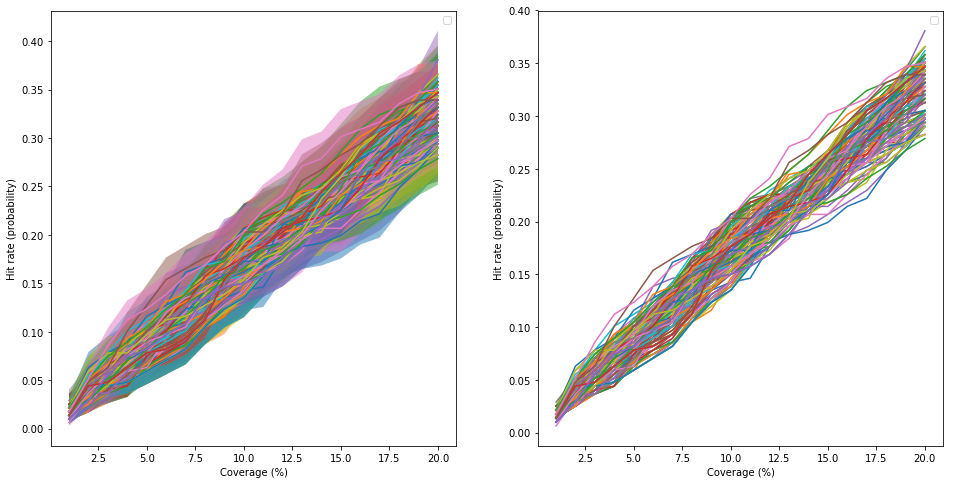

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
analysis.plot_betas(betas, axes[0], range(1,21))
analysis.plot_betas(betas, axes[1], range(1,21), False)
for ax in axes:
    ax.legend([])

In [25]:
def ordered_by_name(name):
    bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
    coverages, max_by_cov = analysis.compute_betas_means_against_max(bs, range(1, 21))
    maxes = [(k,np.mean(v)) for k,v in max_by_cov.items()]
    maxes.sort(key = lambda pr : -pr[1])
    return maxes

want = []
for name in {analysis.parse_prediction_key(key).name for key in betas}:
    maxes = ordered_by_name(name)
    key = maxes[0][0]
    want.append(key)

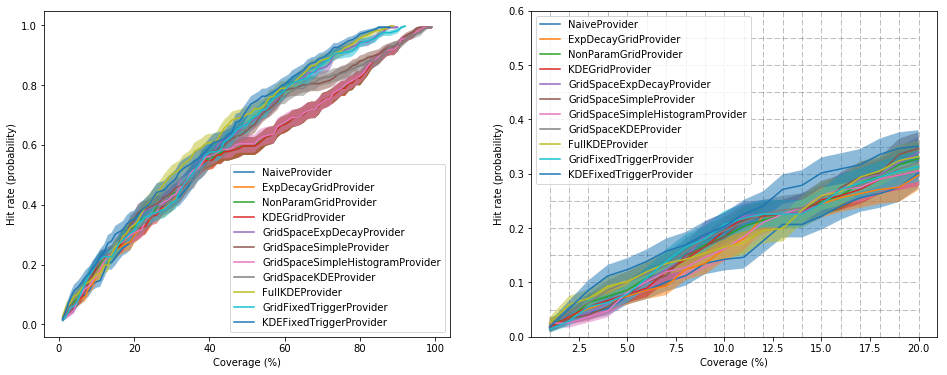

In [26]:
bs = {k:v for k,v in betas.items() if k in want}

fig, axes = plt.subplots(ncols=2, figsize=(16,6))
analysis.plot_betas(bs, axes[0])
analysis.plot_betas(bs, axes[1], coverages=range(1,21))
axes[1].set(ylim=[0,0.6])

for ax, loc in zip(axes, [4, 2]):
    ax.legend([analysis.parse_prediction_key(k).name for k in bs], loc=loc)
ax = axes[1]
for y in range(12):
    ax.plot([1, 20], [y/20, y/20], linewidth=0.5, linestyle="--", alpha=0.5, color="black", zorder=-20)
for x in np.linspace(1, 20, 20):
    ax.plot([x, x], [0, 0.6], linewidth=0.5, linestyle="--", alpha=0.5, color="black", zorder=-20)

In [27]:
#fig.savefig("../all_north_preds.pdf")

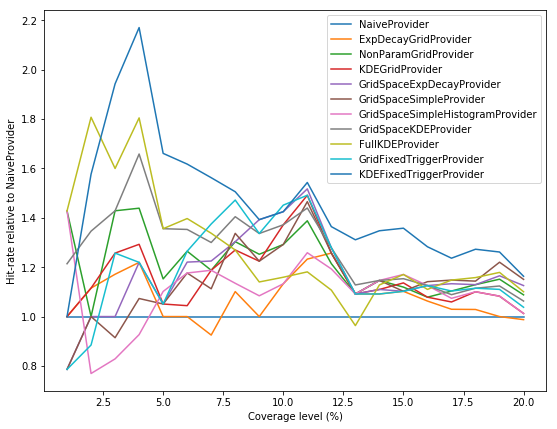

In [28]:
fig, ax = plt.subplots(figsize=(9,7))

base = bs['NaiveProvider (CountingGridKernel)']

x = list(range(1, 21))
by_key = []
for key, b in bs.items():
    y = [b[t].median() / base[t].median() for t in x]
    ax.plot(x, y)
    by_key.append((analysis.parse_prediction_key(key).name, np.mean(y)))
ax.legend([analysis.parse_prediction_key(k).name for k in bs])
ax.set(xlabel="Coverage level (%)", ylabel="Hit-rate relative to NaiveProvider")
None

In [31]:
fig.savefig("../all_mod_north_preds_normed.pdf")

In [30]:
by_key.sort(key = lambda pa : pa[1])
by_key

[('NaiveProvider', 1.0),
 ('ExpDecayGridProvider', 1.0774335760333638),
 ('GridSpaceSimpleHistogramProvider', 1.1012465116695185),
 ('GridSpaceSimpleProvider', 1.141650697371843),
 ('KDEGridProvider', 1.1616214867266517),
 ('GridSpaceExpDecayProvider', 1.1700229162429223),
 ('GridFixedTriggerProvider', 1.1822177916376497),
 ('NonParamGridProvider', 1.2128740965894109),
 ('GridSpaceKDEProvider', 1.2714997194757367),
 ('FullKDEProvider', 1.277222638784512),
 ('KDEFixedTriggerProvider', 1.4497104427819356)]